In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
col_list = ["epochs", "lr","loss", "dice", "jaccard"]
validation_df = pd.read_csv("C:\\Users\\ek779475\\Documents\\Koutoulakis\\automatic_segmentation\\networks\\result\\AttU_Net\\RECTUM_100_Epocs\\result_validation.csv",usecols=col_list)
# validation_df.rename(columns={0: 'epoch', 1: 'lr', 2:"valid_loss", 3:"dice"}, inplace=True)
train_df = pd.read_csv("C:\\Users\\ek779475\\Documents\\Koutoulakis\\automatic_segmentation\\networks\\result\\AttU_Net\\RECTUM_100_Epocs\\result_train.csv",usecols=col_list)
# train_df.rename(columns={0: 'epochs', 1: 'lr', 2:"loss", 3:"dice"}, inplace=True)
def plot_results(x,y1,y2,label1 = "", label2="", title=""):
    epochs = range(1,x)
    plt.plot(epochs, y1, 'b', label=label1)
    plt.plot(epochs, y2, 'g', label=label2)
    plt.title(title)
    plt.xlabel('Epochs')

    plt.ylabel('Loss')

    plt.legend()

    plt.show()

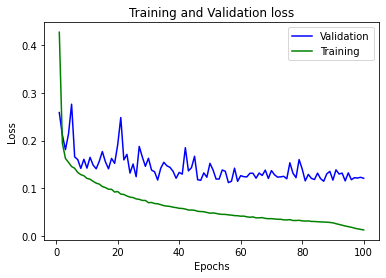

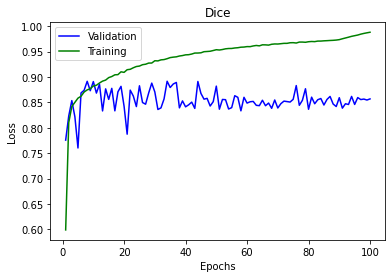

In [19]:
validation_loss = validation_df["loss"].tolist()
train_loss = train_df["loss"].tolist()


validation_dice = np.array(validation_df["dice"].tolist())
validation_dice_mean = validation_dice.mean()
# print(validation_dice_mean)
validation_dice_std = np.std(validation_dice)
# print(validation_dice_std)
# print(validation_dice[0:5])
normalized_validation_dice = np.where(validation_dice < validation_dice_mean, validation_dice+validation_dice_std, validation_dice-validation_dice_std)
# print(normalized_validation_dice[0:5])

train_dice = train_df["dice"].tolist()

epochs = validation_df["epochs"]

valication_jaccard = validation_df["jaccard"].tolist()
train_jaccard = train_df["jaccard"].tolist()

plot_results(len(epochs)+1, validation_loss, train_loss, label1="Validation", label2= "Training", title="Training and Validation loss")
plot_results(len(epochs)+1, normalized_validation_dice, train_dice, label1="Validation", label2= "Training", title= "Dice")
# plot_results(len(epochs)+1, valication_jaccard, train_jaccard, label1="Validation", label2= "Training", title="Jaccard")



plt.show()